In [39]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# load the data
train_df = pd.read_csv('data/sales_train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [41]:
# load supplemental data 
items_df = pd.read_csv('data/items.csv')
item_cats_df = pd.read_csv('data/item_categories.csv')
shops_df = pd.read_csv('data/shops.csv')
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [42]:
item_cats_df.head()


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [43]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [44]:
# combine the data based on the other tables to create a new train set
train_df = train_df.merge(items_df, how='left', on='item_id')
train_df = train_df.merge(item_cats_df, how='left', on='item_category_id')
train_df = train_df.merge(shops_df, how='left', on='shop_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [45]:
# convert the date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

In [46]:
# dropping the columns that are not needed
train_df.drop(['item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)
train_df.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,37
1,2013-01-03,0,25,2552,899.00,1.0,58
2,2013-01-05,0,25,2552,899.00,-1.0,58
3,2013-01-06,0,25,2554,1709.05,1.0,58
4,2013-01-15,0,25,2555,1099.00,1.0,56


In [47]:
# checking for missing values
train_df.isnull().sum()


date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

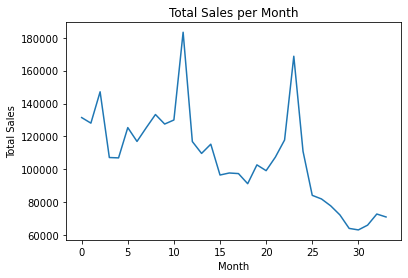

In [48]:
# plot the train data based on total item_cnt_day per month for all available years
train_df.groupby('date_block_num')['item_cnt_day'].sum().plot()
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()
